In [ ]:
!pip install pyspark

In [15]:
from pyspark.sql import SparkSession
#criando a nova sessão
spark = SparkSession.builder.appName("FGV").getOrCreate()

In [48]:
# Chamando a sessão que criamos e lendo o arquivo csv; "show(5)" é para mostrar os 5 registros
spark.read.format('csv').option('header',True).load('sample_data/RELATORIO_DTB_BRASIL_MUNICIPIO.csv').show(5)

+---+--------+-------------------------------+------------------------------------+--------------------------+-------------------------------+---------+-------------------------+--------------------+
| UF| Nome_UF|Regiao_Geografica_Intermediaria|Nome_Regiao_Geografica_Intermediaria|Regiao_Geografica_Imediata|Nome_Regiao_Geografica_Imediata|Municipio|Codigo_Municipio_Completo|      Nome_Municipio|
+---+--------+-------------------------------+------------------------------------+--------------------------+-------------------------------+---------+-------------------------+--------------------+
| 11|Rondônia|                           1102|                           Ji-Paraná|                    110005|                         Cacoal|    00015|                  1100015|Alta Floresta D'O...|
| 11|Rondônia|                           1102|                           Ji-Paraná|                    110005|                         Cacoal|    00379|                  1100379|Alto Alegre dos P...|


In [19]:
# Salvando em um Data Frame
df = spark.read.format('csv').option('header',True).load('sample_data/RELATORIO_DTB_BRASIL_MUNICIPIO.csv')

In [20]:
# Mostrando o Data Frame apenas 5
df.show(5)

+---+--------+-------------------------------+------------------------------------+--------------------------+-------------------------------+---------+-------------------------+--------------------+
| UF| Nome_UF|Regiao_Geografica_Intermediaria|Nome_Regiao_Geografica_Intermediaria|Regiao_Geografica_Imediata|Nome_Regiao_Geografica_Imediata|Municipio|Codigo_Municipio_Completo|      Nome_Municipio|
+---+--------+-------------------------------+------------------------------------+--------------------------+-------------------------------+---------+-------------------------+--------------------+
| 11|Rondônia|                           1102|                           Ji-Paraná|                    110005|                         Cacoal|    00015|                  1100015|Alta Floresta D'O...|
| 11|Rondônia|                           1102|                           Ji-Paraná|                    110005|                         Cacoal|    00379|                  1100379|Alto Alegre dos P...|


In [21]:
df.count()

5570

### DataFrame de Região

In [49]:
# Criar o DF de regiao
regiao_cols = ['Nome_UF', 'Nome_Municipio', 'Nome_Regiao_Geografica_Intermediaria', 'Nome_Regiao_Geografica_Imediata']
regiao_df = df.select(*regiao_cols)
regiao_df.show(5)

+--------+--------------------+------------------------------------+-------------------------------+
| Nome_UF|      Nome_Municipio|Nome_Regiao_Geografica_Intermediaria|Nome_Regiao_Geografica_Imediata|
+--------+--------------------+------------------------------------+-------------------------------+
|Rondônia|Alta Floresta D'O...|                           Ji-Paraná|                         Cacoal|
|Rondônia|Alto Alegre dos P...|                           Ji-Paraná|                         Cacoal|
|Rondônia|        Alto Paraíso|                         Porto Velho|                      Ariquemes|
|Rondônia|    Alvorada D'Oeste|                           Ji-Paraná|                      Ji-Paraná|
|Rondônia|           Ariquemes|                         Porto Velho|                      Ariquemes|
+--------+--------------------+------------------------------------+-------------------------------+
only showing top 5 rows



In [50]:
# Agrupar
df_cout_UF = df.groupBy("Nome_UF").count()

# Mostrar o resultado
df_cout_UF.show()

+-------------------+-----+
|            Nome_UF|count|
+-------------------+-----+
|     Santa Catarina|  295|
| Mato Grosso do Sul|   79|
|              Goiás|  246|
|        Mato Grosso|  141|
|              Ceará|  184|
|              Piauí|  224|
|     Espírito Santo|   78|
|             Paraná|  399|
|            Alagoas|  102|
|              Bahia|  417|
|            Roraima|   15|
|   Distrito Federal|    1|
|         Pernambuco|  185|
|           Amazonas|   62|
|               Acre|   22|
|  Rio Grande do Sul|  497|
|Rio Grande do Norte|  167|
|            Sergipe|   75|
|          São Paulo|  645|
|     Rio de Janeiro|   92|
+-------------------+-----+
only showing top 20 rows



In [30]:
# Agrupar pelos tipos de item e contar a quantidade de registros (chamados)
df_cout_Intermediaria = df.groupBy("Nome_Regiao_Geografica_Intermediaria").count()

# Mostrar o resultado
df_cout_Intermediaria.show()

+------------------------------------+-----+
|Nome_Regiao_Geografica_Intermediaria|count|
+------------------------------------+-----+
|                           Barbacena|   49|
|                Oiapoque - Porto ...|   10|
|                 São Raimundo Nonato|   21|
|                            Colatina|   18|
|                           Fortaleza|   51|
|                             Uberaba|   29|
|                            Floriano|   28|
|                            Dourados|   34|
|                            Curitiba|   45|
|                          Petrópolis|   19|
|                Santa Inês - Bacabal|   59|
|                        Campo Grande|   32|
|                              Macapá|    6|
|                   Juazeiro do Norte|   30|
|                  Porangatu - Uruaçu|   46|
|                              Palmas|   42|
|                            São Luís|   73|
|                 Presidente Prudente|   55|
|                Luziânia - Águas ...|   34|
|         

In [32]:
# Agrupar pelos tipos de item e contar a quantidade de registros (chamados)
df_cout_Imediata = df.groupBy("Nome_Regiao_Geografica_Imediata").count()

# Mostrar o resultado
df_cout_Imediata.show()

+-------------------------------+-----+
|Nome_Regiao_Geografica_Imediata|count|
+-------------------------------+-----+
|             São João dos Patos|   11|
|           São Gabriel - Caç...|    6|
|                        Mantena|    7|
|                        Aracati|    5|
|                         Pombal|    7|
|                      Barbacena|   14|
|                   Juiz de Fora|   29|
|                        Brusque|    7|
|            São Raimundo Nonato|   13|
|                       Monteiro|    7|
|                     Pedra Azul|    7|
|                       Colatina|   13|
|                   Santo Ângelo|    8|
|           Águas Lindas de G...|    7|
|                   Pires do Rio|    5|
|                           Jaru|    5|
|                      Fortaleza|   20|
|           São Sebastião do ...|    5|
|           Cornélio Procópio...|   18|
|                         Santos|   11|
+-------------------------------+-----+
only showing top 20 rows



### Graficos

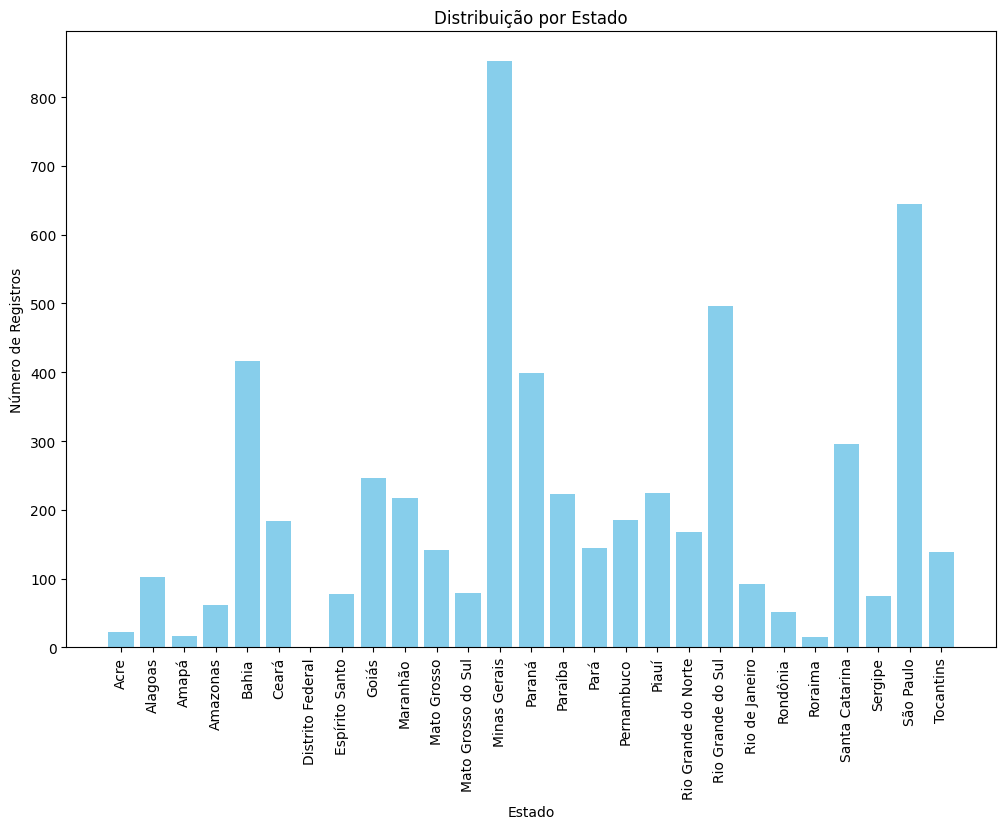

In [34]:
# Agrupar e contar por 'Nome_UF', tranformando em pandas e ordenando pelo 'Nome_UF'
uf_counts = df.groupBy('Nome_UF').count().toPandas().sort_values('Nome_UF')

# Criando o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(uf_counts['Nome_UF'], uf_counts['count'], color='skyblue')
plt.title('Distribuição por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()

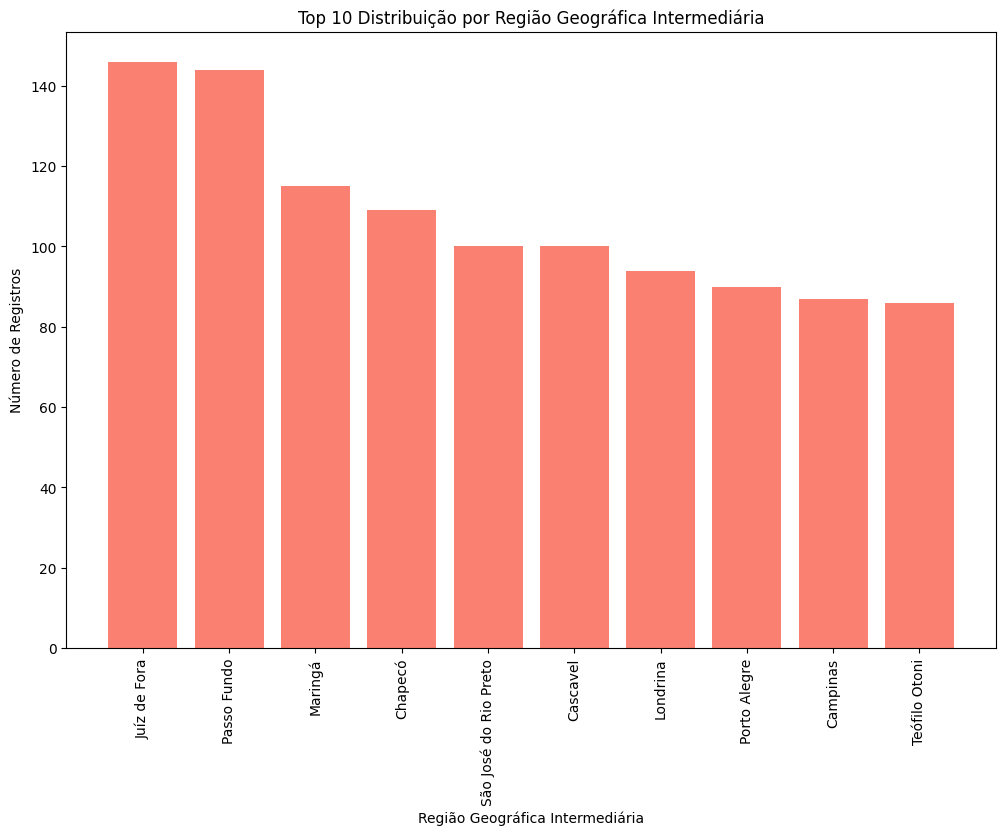

In [47]:
# Agrupar e contar por 'Nome_Regiao_Geografica_Intermediaria', tranformando em pandas e ordenando pelo nome da região
regiao_intermediaria_counts = df.groupBy('Nome_Regiao_Geografica_Intermediaria').count().toPandas().sort_values('count', ascending=False).head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(regiao_intermediaria_counts['Nome_Regiao_Geografica_Intermediaria'], regiao_intermediaria_counts['count'], color='salmon')
plt.title('Top 10 Distribuição por Região Geográfica Intermediária')
plt.xlabel('Região Geográfica Intermediária')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()

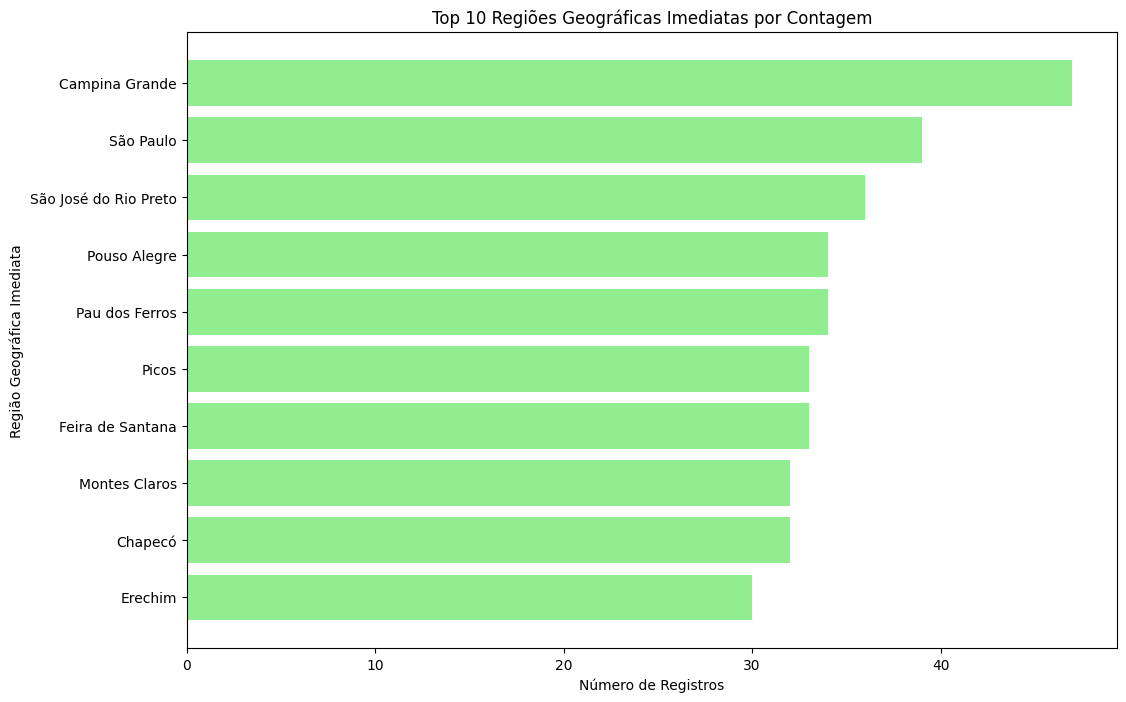

In [45]:
# Agrupar e contar por 'Nome_Regiao_Geografica_Imediata', tranformando em pandas e ordenando pelo nome da região
regiao_imediata_counts = df.groupBy('Nome_Regiao_Geografica_Imediata').count().toPandas().sort_values('count', ascending=False).head(10) # Limit to top 10 regions

# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(regiao_imediata_counts['Nome_Regiao_Geografica_Imediata'], regiao_imediata_counts['count'], color='lightgreen')
plt.title('Top 10 Regiões Geográficas Imediatas por Contagem')
plt.ylabel('Região Geográfica Imediata')
plt.xlabel('Número de Registros')
plt.gca().invert_yaxis() # Inverte o eixo y para que a região com maior contagem fique no topo
plt.show()